<a href="https://colab.research.google.com/github/nimish1402/placement-prediction-model/blob/main/place.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Inserting the dataset


In [17]:
df = pd.read_csv('/content/placement (1).csv')


In [18]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


preprocessing to remove the unusable column named **unnamed 0**


In [19]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


now for checking the accuracy of the ML model we hide some of the data from model i.e we divide the dataset into 2 parts one be the training set and other one be the testing set .
for a given 100 students data we hide 10 students data for testing the model's accuracy

steps
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

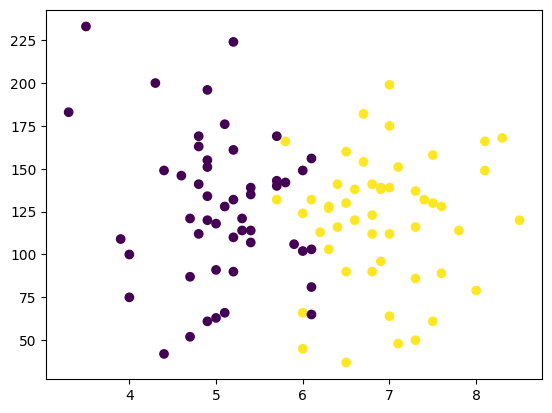

In [20]:
# EDA : plotting the dataset on the graph
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])
# c = df['placement'] color codes the graphs showing that dots with blue color are not placed and dots with yellow color are placed


logistic regression Machine Learning model for training the model


In [21]:
# step 1
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [22]:
x


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [23]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [24]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)


In [25]:
x_train

,cgpa,iq
22,4.9,120.0
36,5.7,140.0
70,6.3,127.0
59,4.8,112.0
46,5.3,114.0
...,...,...
37,8.1,149.0
4,5.8,142.0
91,7.5,158.0
50,3.5,233.0


In [26]:
x_test

,cgpa,iq
68,4.0,75.0
8,6.1,156.0
40,4.9,134.0
5,7.1,48.0
87,5.7,132.0
7,5.0,63.0
61,7.3,137.0
71,6.1,132.0
76,4.9,155.0
12,5.4,139.0


In [27]:
y_train

22    0
36    0
70    1
59    0
46    0
     ..
37    1
4     0
91    1
50    0
64    1
Name: placement, Length: 90, dtype: int64

In [28]:
y_test

68    0
8     0
40    0
5     1
87    1
7     0
61    1
71    1
76    0
12    0
Name: placement, dtype: int64

In [29]:
# step 2 scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.98329661, -0.10770104],
       [-0.28647224,  0.39323404],
       [ 0.23614604,  0.06762624],
       [-1.07039966, -0.30807508],
       [-0.63488443, -0.25798157],
       [-0.54778138, -0.43330885],
       [ 1.71689783, -1.13461796],
       [ 0.75876432, -0.70882314],
       [ 0.58455822,  1.44519771],
       [-0.54778138, -0.25798157],
       [-0.0251631 ,  0.61865483],
       [-0.72198747,  2.49716138],
       [ 1.97820697,  1.09454315],
       [-0.89619357, -0.15779455],
       [-1.07039966,  0.41828079],
       [ 0.41035213,  0.1427665 ],
       [-0.72198747, -0.35816858],
       [-1.15750271, -1.81088032],
       [ 0.67166127, -0.03256078],
       [ 0.67166127, -0.85910367],
       [ 0.14904299, -0.28302832],
       [-0.63488443, -0.08265429],
       [ 0.32324908, -0.20788806],
       [ 1.1071765 , -0.20788806],
       [-1.07039966,  1.11958991],
       [ 0.23614604,  0.09267299],
       [-0.98329661,  0.66874833],
       [-0.80909052,  0.09267299],
       [ 0.06193994,

In [30]:
x_test = scaler.fit_transform(x_test)


In [31]:
# step 4 : training the model
from sklearn.linear_model import LogisticRegression

In [32]:
clf = LogisticRegression()

In [34]:
clf.fit(x_train,y_train)

LogisticRegression()

#evaluating the model
#step 5

In [35]:
y_pred = clf.predict(x_test)

In [36]:
y_test
# we can compare the the output in the y_test to the ouput we got from clf.predict(x_test) to check the accuracy of the pridiction model

68    0
8     0
40    0
5     1
87    1
7     0
61    1
71    1
76    0
12    0
Name: placement, dtype: int64

In [39]:
# comparing the x_test with the result of Y_test to check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

<Axes: >

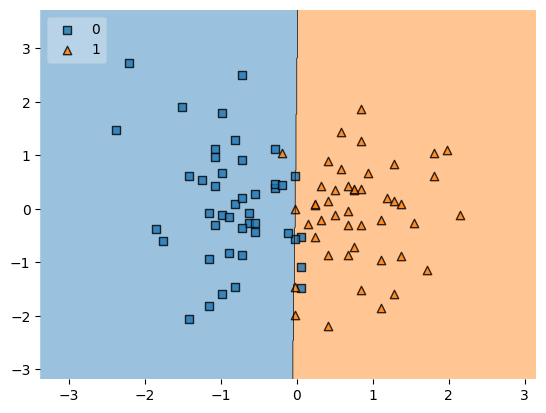

In [45]:
# plotting the desicion boundry
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [46]:
#step 6 deploying the model
import pickle


In [47]:
pickle.dump(clf, open('model.pkl','wb'))